In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Reading the data
data = pd.read_csv('C:/Users/HP/Documents/Portfolio_projects/Datasets/netflix1.csv')
data.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [3]:
# Checking information about the data and its columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [4]:
# Checking number of rows and columns of the data
data.shape

(8790, 10)

In [5]:
# Checking if there are null values in every column
data.isnull().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [6]:
# Checking duplicate rows
data.duplicated().sum()

0

In [7]:
# Changing datatype of 'date_added' column from 'object' to 'datetime'
data['date_added']=pd.to_datetime(data['date_added'], format='%m/%d/%Y')

In [8]:
# Checking datatype of 'date_added' column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8790 non-null   object        
 1   type          8790 non-null   object        
 2   title         8790 non-null   object        
 3   director      8790 non-null   object        
 4   country       8790 non-null   object        
 5   date_added    8790 non-null   datetime64[ns]
 6   release_year  8790 non-null   int64         
 7   rating        8790 non-null   object        
 8   duration      8790 non-null   object        
 9   listed_in     8790 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 686.8+ KB


In [9]:
# Separating words present in 'listed_in' column and putting them in separate columns
new=data['listed_in'].str.split(',', expand=True)
new.head()

,0,1,2
0,Documentaries,None,None
1,Crime TV Shows,International TV Shows,TV Action & Adventure
2,TV Dramas,TV Horror,TV Mysteries
3,Children & Family Movies,Comedies,None
4,Dramas,Independent Movies,International Movies


In [10]:
# Creating news columns to store the abovementioned separate columns
data['Category_1']=new[0].copy()
data['Category_2']=new[1].copy()
data['Category_3']=new[2].copy()

In [11]:
# Deleting spaces present at the starting and ending of the words 
data['Category_1']=data['Category_1'].str.strip()
data['Category_2']=data['Category_2'].str.strip()
data['Category_3']=data['Category_3'].str.strip()

In [12]:
# Dropping 'listed_in' column
data.drop('listed_in', axis=1, inplace=True)

In [13]:
# Checking dataframe
data.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,Category_1,Category_2,Category_3
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,None,None
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,Crime TV Shows,International TV Shows,TV Action & Adventure
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,TV Dramas,TV Horror,TV Mysteries
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,Children & Family Movies,Comedies,None
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,Dramas,Independent Movies,International Movies


In [14]:
# Checking unique values present in 'type' column
data.type.unique()

array(['Movie', 'TV Show'], dtype=object)

In [15]:
# Separating different values present in 'type' column into separate datasets
TV_Show_df = data[data['type'] == 'TV Show'].copy()
Movie_df = data[data['type'] == 'Movie'].copy()

In [16]:
# Checking first row of 'TV_Show_df' dataset
TV_Show_df.head(1)

,show_id,type,title,director,country,date_added,release_year,rating,duration,Category_1,Category_2,Category_3
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,Crime TV Shows,International TV Shows,TV Action & Adventure


In [17]:
#Checking first row of 'Movie_df' dataset
Movie_df.head(1)

,show_id,type,title,director,country,date_added,release_year,rating,duration,Category_1,Category_2,Category_3
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,None,None


In [18]:
# Checking unique values present in 'duration' column in TV_Show_df 
TV_Show_df.duration.unique()

array(['1 Season', '9 Seasons', '2 Seasons', '4 Seasons', '6 Seasons',
       '3 Seasons', '5 Seasons', '7 Seasons', '8 Seasons', '15 Seasons',
       '10 Seasons', '17 Seasons', '13 Seasons', '12 Seasons',
       '11 Seasons'], dtype=object)

In [19]:
# Extracting numbers from 'duration' column of TV_Show_df and storing them in a new column 
TV_Show_df['Duration(Season/s)']= TV_Show_df['duration'].apply(lambda x: x.split(' ')[0])

In [20]:
# Droping 'duration' column from TV_Show_df
TV_Show_df.drop('duration', axis=1, inplace=True)

In [21]:
# Extracting numbers from 'duration' column of Movie_df and storing them in a new column 
Movie_df['Duration(Mins)']= Movie_df['duration'].apply(lambda x: x.split(' ')[0])

In [22]:
# Dropping 'duration' column from Movie_df
Movie_df.drop('duration', axis=1, inplace=True)

In [23]:
# Changing data type of 'Duration(Season/s)' and 'Duration(Mins)' column to int
TV_Show_df['Duration(Season/s)'] = TV_Show_df['Duration(Season/s)'].astype('int32')
Movie_df['Duration(Mins)'] = Movie_df['Duration(Mins)'].astype('int32')

In [24]:
# Resetting index of TV_Show_df and Movie_df
TV_Show_df.reset_index(inplace=True)
Movie_df.reset_index(inplace=True)

In [25]:
# Dropping 'index' column from TV_Show_df and Movie_df
TV_Show_df.drop('index',axis=1,inplace=True)
Movie_df.drop('index',axis=1, inplace=True)

In [26]:
# Checking first row of TV_Show_df dataset 
TV_Show_df.head(1)

,show_id,type,title,director,country,date_added,release_year,rating,Category_1,Category_2,Category_3,Duration(Season/s)
0,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,Crime TV Shows,International TV Shows,TV Action & Adventure,1


In [27]:
# Checking first row of Movie_df dataset
Movie_df.head(1)

,show_id,type,title,director,country,date_added,release_year,rating,Category_1,Category_2,Category_3,Duration(Mins)
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,Documentaries,None,None,90


## Comparison between TV shows and Movies 

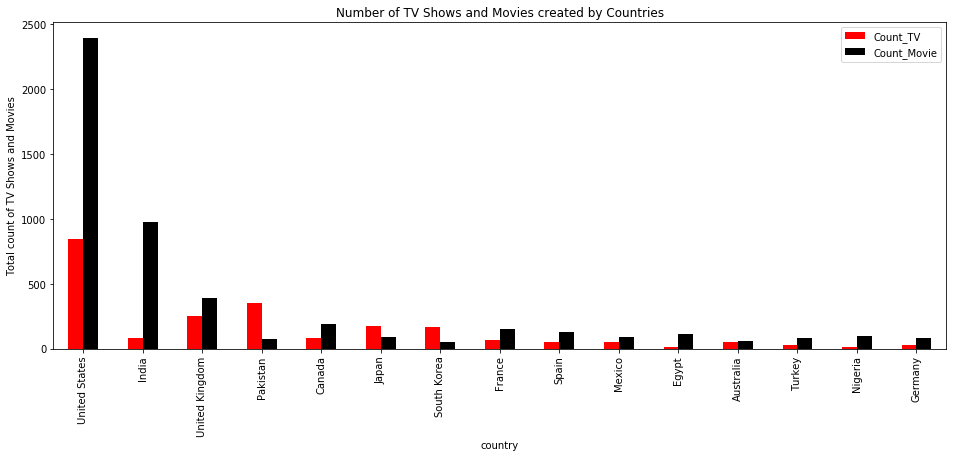

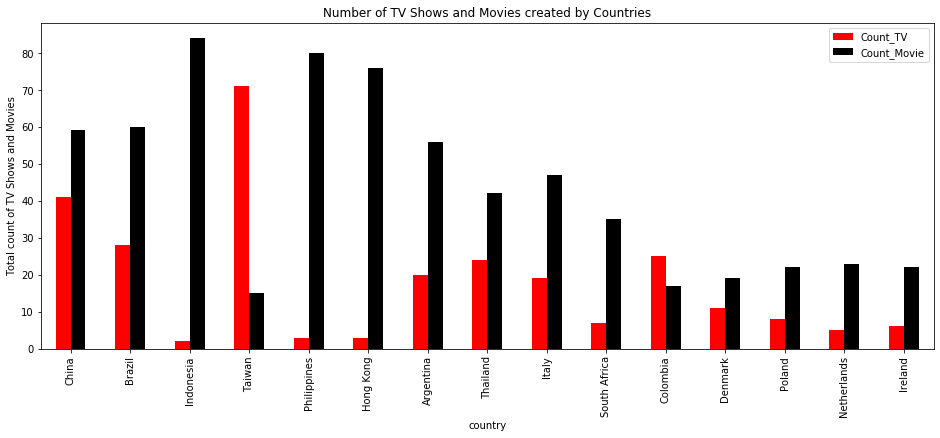

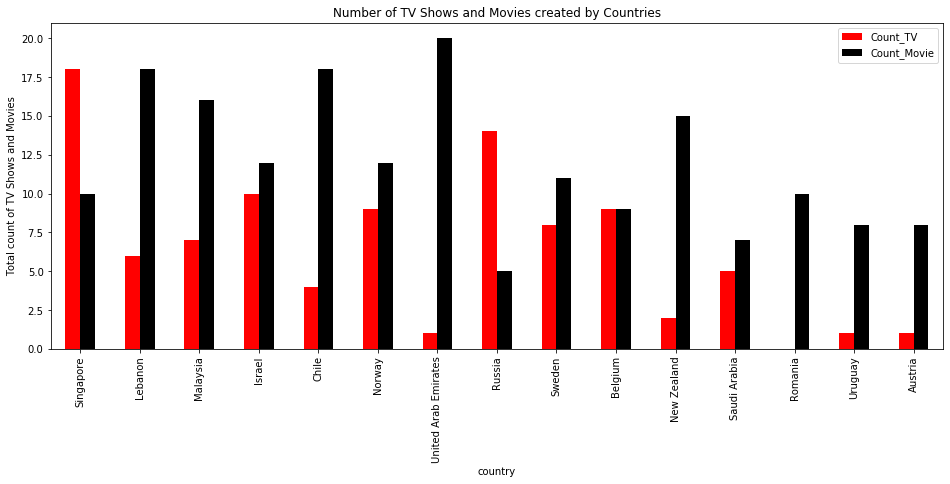

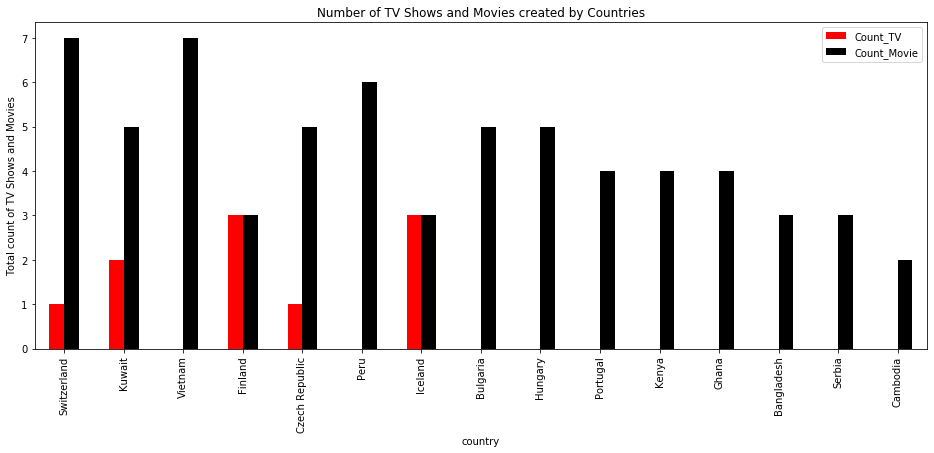

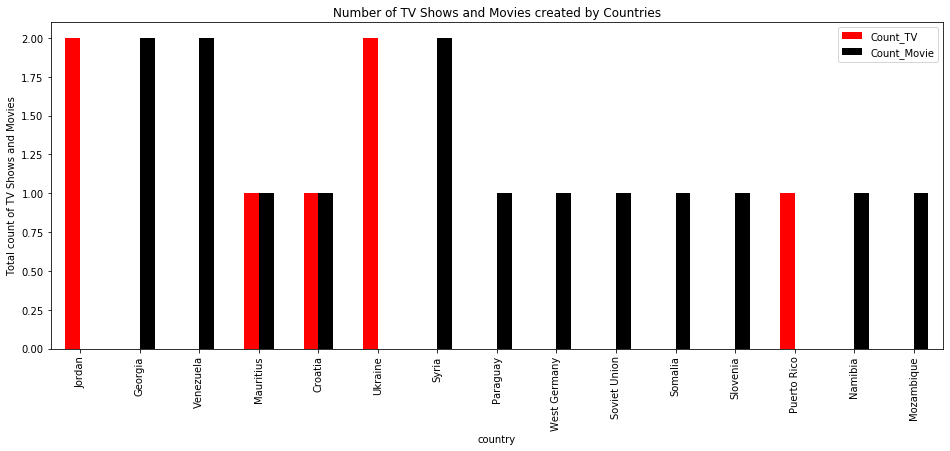

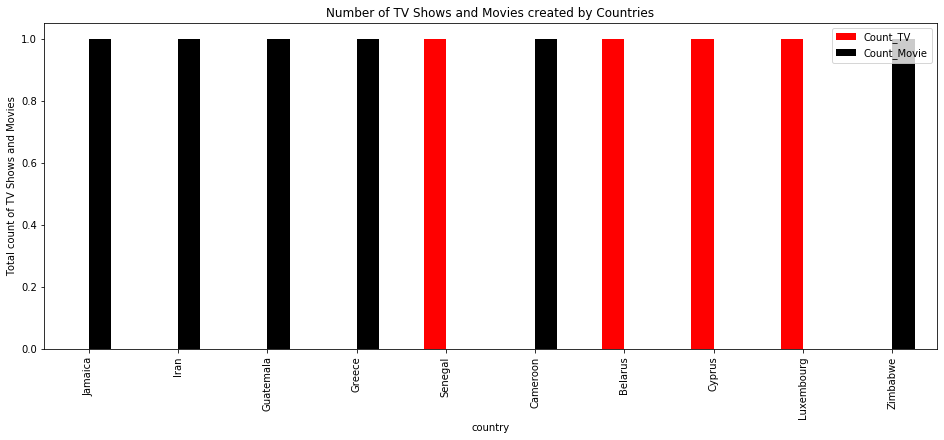

In [28]:
# Number of Movies and TV shows produced by each country

TVs_country = TV_Show_df.pivot_table(index='country', values='title', aggfunc='count')
Movies_country = Movie_df.pivot_table(index='country', values='title', aggfunc='count')
Movies_country.drop('Not Given', axis=0, inplace=True)
TVs_country.drop('Not Given', axis=0, inplace=True)
TVs_country = TVs_country.rename(columns={'title': 'Count_TV'})
Movies_country = Movies_country.rename(columns={'title': 'Count_Movie'})
TV_Movie_country = pd.concat([TVs_country, Movies_country], axis=1)
TV_Movie_country = TV_Movie_country.fillna(0)
TV_Movie_country['Total_count'] = TV_Movie_country['Count_TV']+TV_Movie_country['Count_Movie']
Sorted_df = TV_Movie_country.sort_values(by='Total_count', ascending=False)[['Count_TV', 'Count_Movie']]
Sorted_df.iloc[:15].plot(kind='bar', figsize=(16,6), title='Number of TV Shows and Movies created by Countries', 
                         ylabel='Total count of TV Shows and Movies', color=('red','black'))
Sorted_df.iloc[15:30].plot(kind='bar', figsize=(16,6), title='Number of TV Shows and Movies created by Countries', 
                         ylabel='Total count of TV Shows and Movies', color=('red','black'))
Sorted_df.iloc[30:45].plot(kind='bar', figsize=(16,6), title='Number of TV Shows and Movies created by Countries', 
                         ylabel='Total count of TV Shows and Movies', color=('red','black'))
Sorted_df.iloc[45:60].plot(kind='bar', figsize=(16,6), title='Number of TV Shows and Movies created by Countries', 
                         ylabel='Total count of TV Shows and Movies', color=('red','black'))
Sorted_df.iloc[60:75].plot(kind='bar', figsize=(16,6), title='Number of TV Shows and Movies created by Countries', 
                         ylabel='Total count of TV Shows and Movies', color=('red','black'))
Sorted_df.iloc[75:].plot(kind='bar', figsize=(16,6), title='Number of TV Shows and Movies created by Countries', 
                         ylabel='Total count of TV Shows and Movies', color=('red','black'))

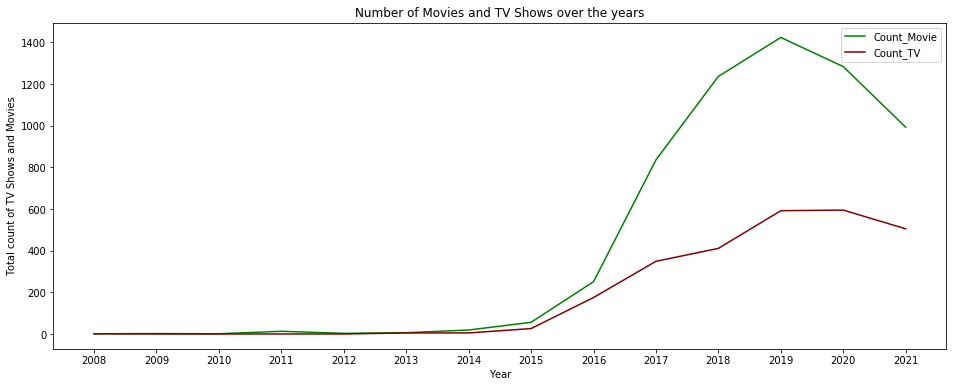

In [29]:
# Number of Movies and TV Shows produced over the years

Movies_year = Movie_df.pivot_table(index= Movie_df.date_added.dt.year, values='title', aggfunc='count')
TVs_year = TV_Show_df.pivot_table(index= TV_Show_df.date_added.dt.year, values='title', aggfunc='count')
Movies_year=Movies_year.rename(columns={'title':'Count_Movie'})
TVs_year = TVs_year.rename(columns={'title':'Count_TV'})
TV_Movie_year = pd.concat([Movies_year, TVs_year], axis=1)
TV_Movie_year= TV_Movie_year.fillna(0)
TV_Movie_year.plot.line(figsize=(16,6), color=('green','maroon'), xlabel='Year', ylabel='Total count of TV Shows and Movies',
                       title='Number of Movies and TV Shows over the years', xticks=TV_Movie_year.index)


## EDA ON TV Shows

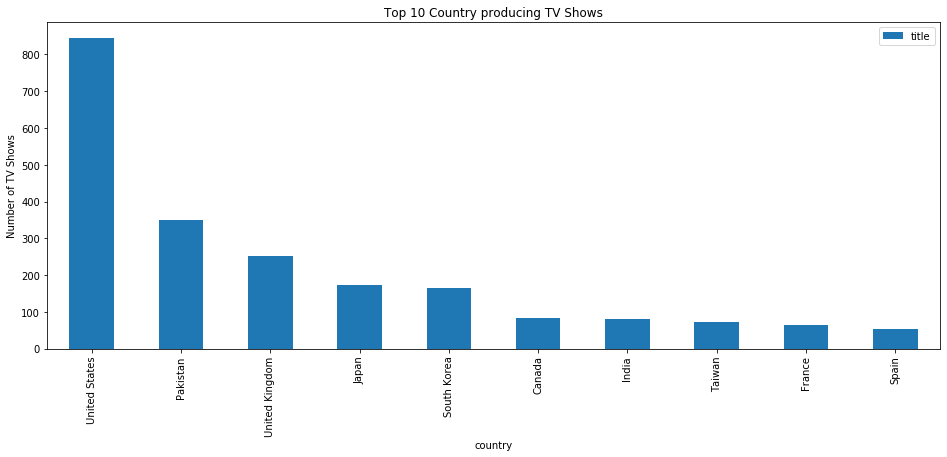

In [30]:
# TV_Shows per country

TV_Show_country = TV_Show_df.pivot_table(index='country', values='title', aggfunc='count')
TV_Show_country.drop('Not Given', axis=0, inplace=True)
TV_Show_country.sort_values(by= 'title',ascending=False).iloc[:10].plot(kind='bar', figsize=(16,6), 
                                                              title='Top 10 Country producing TV Shows', 
                                                              ylabel='Number of TV Shows')

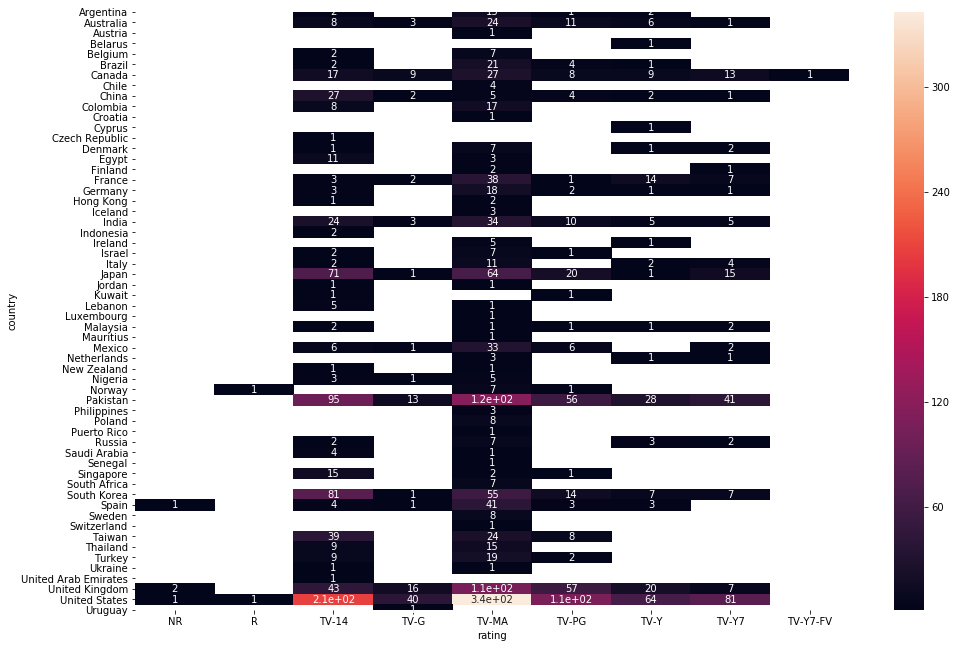

In [31]:
# Which country has produced maximum TV_Show in every rating category
TV_Show_rating = TV_Show_df.pivot_table(index='country',columns='rating', values='title', aggfunc='count')
# drop not_given country from TV_Show_rating
TV_Show_rating.drop('Not Given', axis=0, inplace=True)
plt.figure(figsize=(16,11))
sns.heatmap(TV_Show_rating, annot=True)
plt.show()

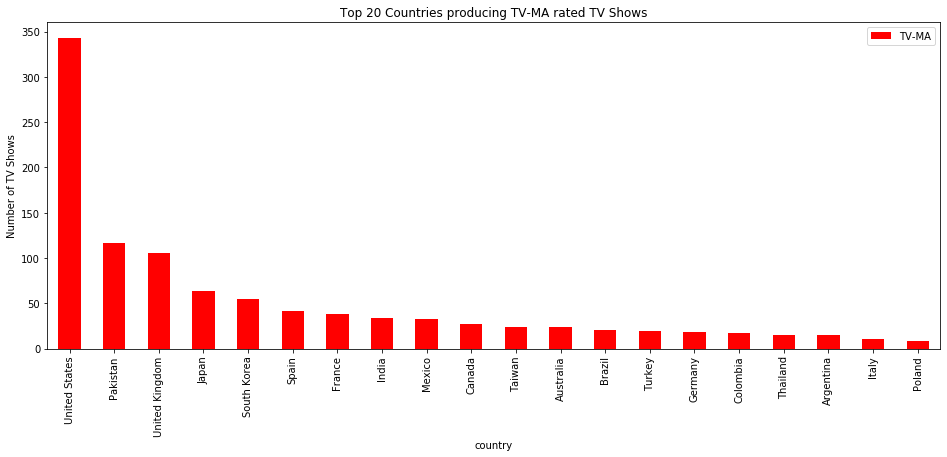

In [32]:
# Top 20 Countries producing TV-MA rated TV Shows
TV_Show_rating['TV-MA'].sort_values(ascending=False).head(20).plot.bar(figsize=(16,6), title='Top 20 Countries producing TV-MA rated TV Shows',
                                                                      ylabel='Number of TV Shows', legend='TV-MA', color='red')

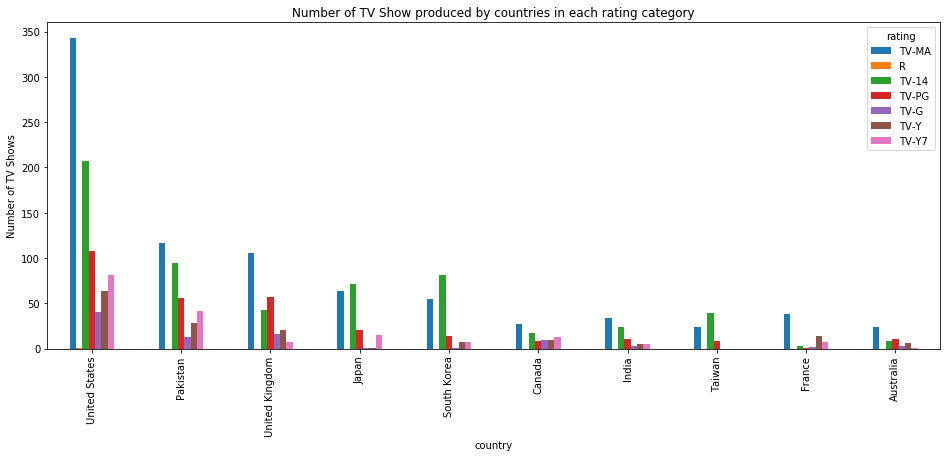

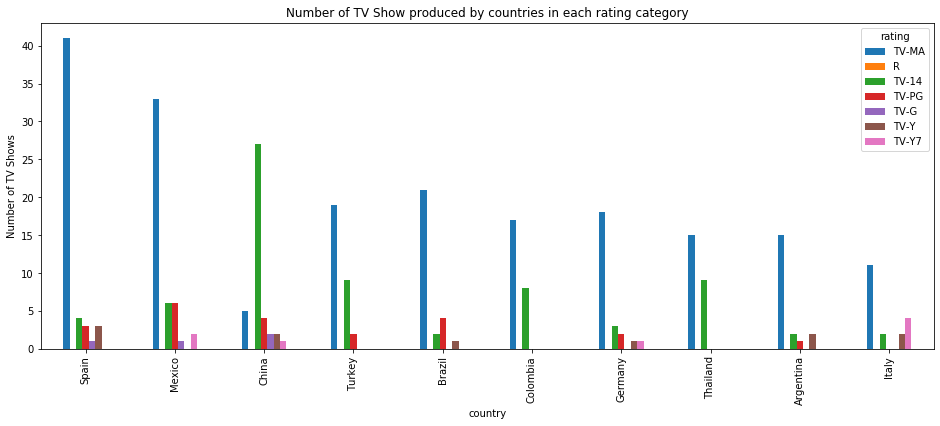

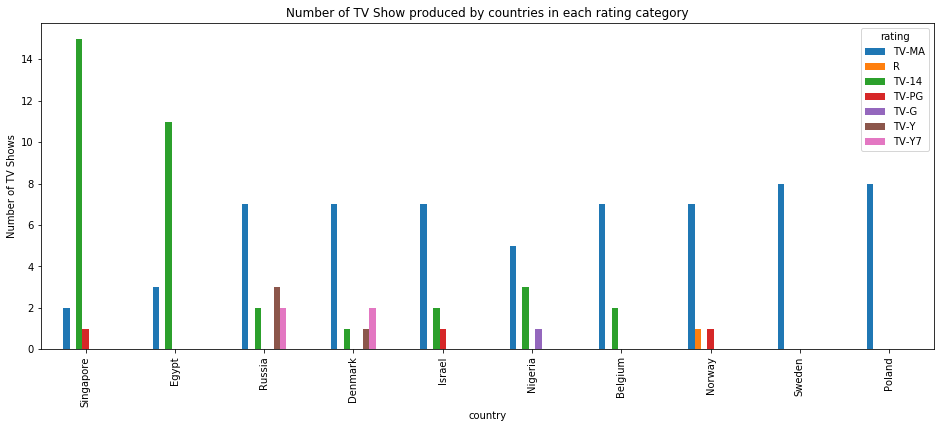

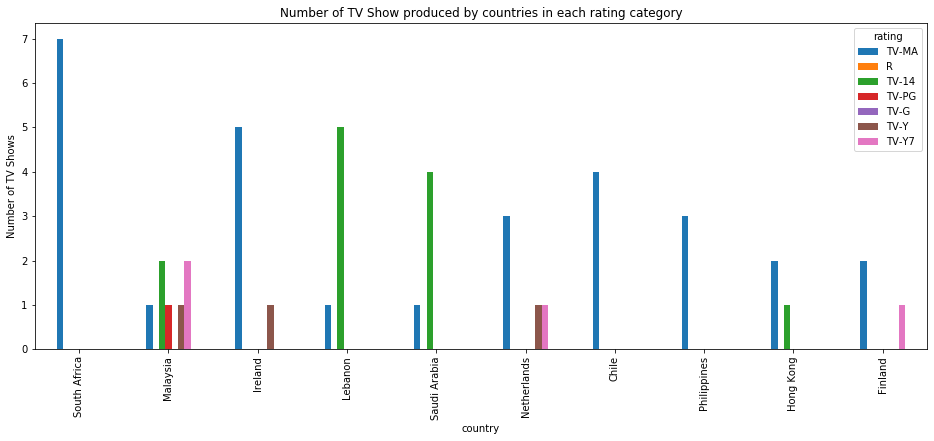

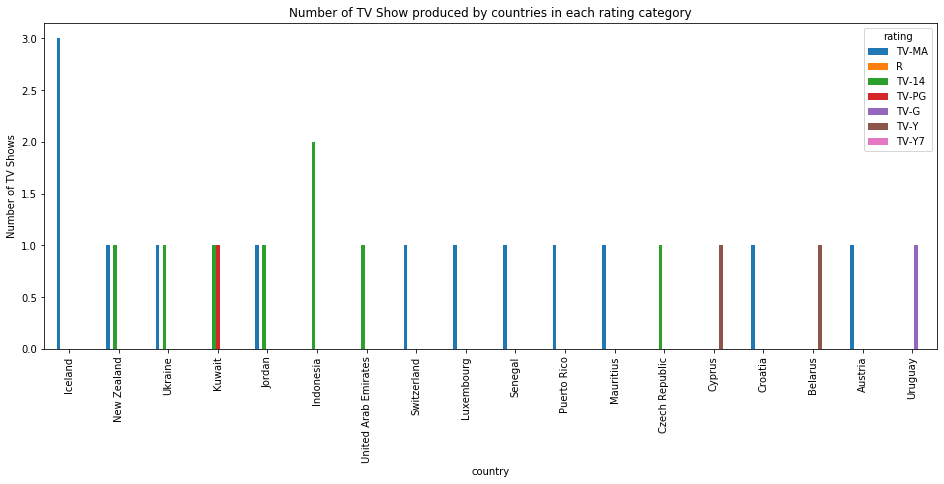

In [33]:
# Number of TV Show produced by countries in each rating category

TV_Show_rating.drop(['NR','TV-Y7-FV'], axis=1, inplace=True)
# replace nan in TV_Show_rating with 0
TV_Show_rating.fillna(0, inplace=True)
TV_Show_rating['Total_count'] = TV_Show_rating['TV-14']+TV_Show_rating['R']+TV_Show_rating['TV-G']+TV_Show_rating['TV-MA']+TV_Show_rating['TV-PG']+TV_Show_rating['TV-Y']+TV_Show_rating['TV-Y7']
Total_sorted = TV_Show_rating.sort_values(by='Total_count', ascending=False)[['TV-MA','R','TV-14', 'TV-PG', 'TV-G', 'TV-Y', 'TV-Y7']]
Total_sorted.iloc[:10].plot.bar(figsize=(16,6), title='Number of TV Show produced by countries in each rating category', ylabel='Number of TV Shows')
Total_sorted.iloc[10:20].plot.bar(figsize=(16,6), title='Number of TV Show produced by countries in each rating category', ylabel='Number of TV Shows')
Total_sorted.iloc[20:30].plot.bar(figsize=(16,6), title='Number of TV Show produced by countries in each rating category', ylabel='Number of TV Shows')
Total_sorted.iloc[30:40].plot.bar(figsize=(16,6), title='Number of TV Show produced by countries in each rating category', ylabel='Number of TV Shows')
Total_sorted.iloc[40:].plot.bar(figsize=(16,6), title='Number of TV Show produced by countries in each rating category', ylabel='Number of TV Shows')

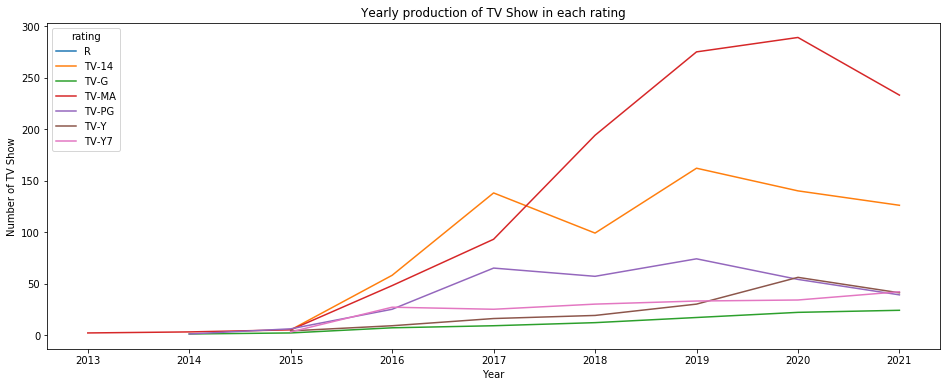

In [34]:
# Production of TV Shows in each rating over the years

TV_Show_year_rating= TV_Show_df.pivot_table(index=TV_Show_df.date_added.dt.year, columns='rating', values='title', aggfunc='count')
TV_Show_year_rating.drop(['NR','TV-Y7-FV'], axis=1, inplace=True)
TV_Show_year_rating.drop(2008, axis=0, inplace=True)
TV_Show_year_rating.plot.line(figsize=(16,6), xlabel='Year', ylabel='Number of TV Show', title='Yearly production of TV Show in each rating')

In [35]:
# Which TV Show has maximum seasons made?
max_season= TV_Show_df['Duration(Season/s)'].max()
TV_Show_df.loc[TV_Show_df['Duration(Season/s)'] == max_season, ['title', 'country', 'rating', 'Duration(Season/s)']]

,title,country,rating,Duration(Season/s)
696,Grey's Anatomy,United States,TV-14,17


In [36]:
# Which TV Show has been added to netflix after being released for the longest?
TV_Show_df['Gap_year'] = TV_Show_df.date_added.dt.year - TV_Show_df.release_year
Gap = TV_Show_df['Gap_year'].max()
TV_Show_df.loc[TV_Show_df.Gap_year == Gap, ['title', 'country', 'date_added', 'release_year','Gap_year', 'rating']]

,title,country,date_added,release_year,Gap_year,rating
194,Pioneers: First Women Filmmakers*,Pakistan,2018-12-30,1925,93,TV-14


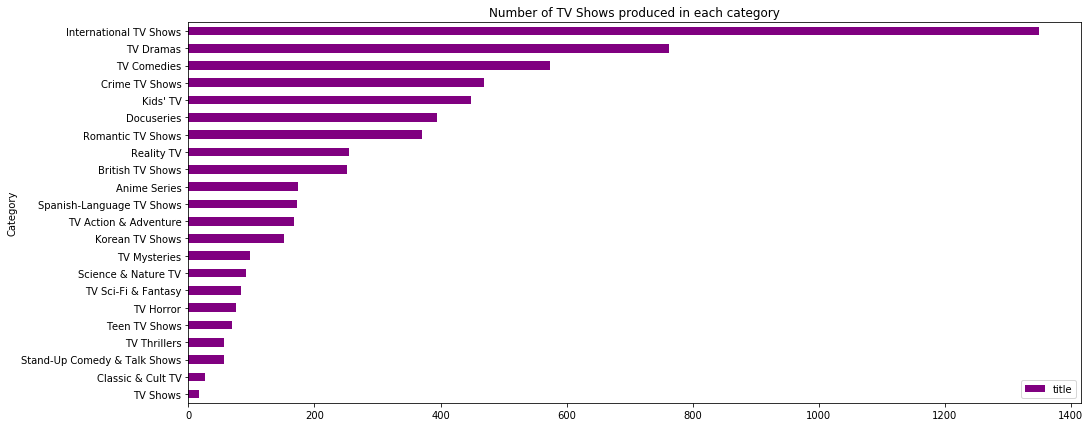

In [37]:
# which category has maximum number of TV Shows?

C1 = TV_Show_df.pivot_table(index='Category_1', values='title',aggfunc='count')
C2 = TV_Show_df.pivot_table(index='Category_2', values='title',aggfunc='count')
C3 = TV_Show_df.pivot_table(index='Category_3', values='title',aggfunc='count')
C_total_1 = C1.add(C2, fill_value=0)
C_total = C_total_1.add(C3, fill_value=0)
C_total.sort_values(by='title').plot.barh(figsize=(16,7), color='purple', ylabel='Number of TV Show',
                                                   xlabel='Category',title='Number of TV Shows produced in each category')

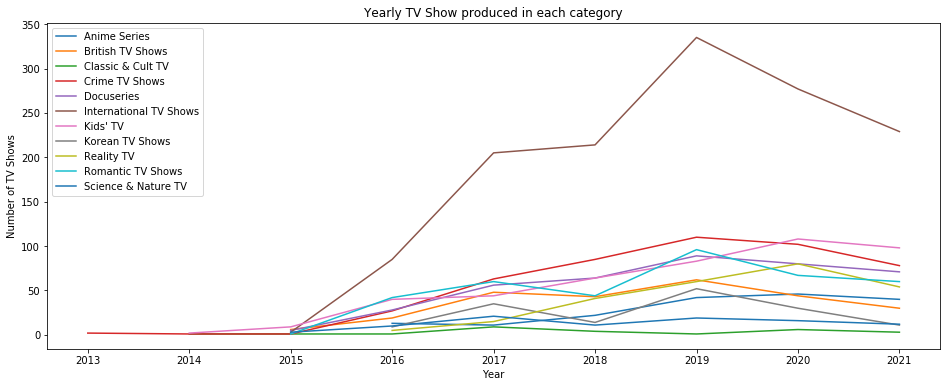

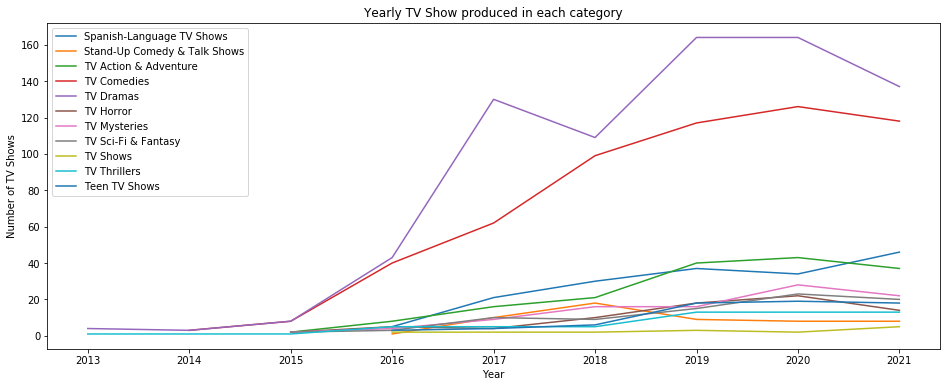

In [38]:
# Yearly TV Show produced in each category 

TV_Show_year_category_1 = TV_Show_df.pivot_table(index=TV_Show_df.date_added.dt.year, columns='Category_1', values='title', aggfunc='count')
TV_Show_year_category_2 = TV_Show_df.pivot_table(index=TV_Show_df.date_added.dt.year, columns='Category_2', values='title', aggfunc='count')
TV_Show_year_category_3 = TV_Show_df.pivot_table(index=TV_Show_df.date_added.dt.year, columns='Category_3', values='title', aggfunc='count')
TV_Show_year_category_1.drop(2008, axis=0, inplace=True)
TV_Show_year_category_T1 = TV_Show_year_category_1.add(TV_Show_year_category_2, fill_value=0)
TV_Show_year_category = TV_Show_year_category_T1.add(TV_Show_year_category_3, fill_value=0)
TV_Show_year_category.iloc[:,:11].plot.line(figsize=(16,6), xlabel='Year', ylabel='Number of TV Shows', title='Yearly TV Show produced in each category')
TV_Show_year_category.iloc[:,11:].plot.line(figsize=(16,6), xlabel='Year', ylabel='Number of TV Shows', title='Yearly TV Show produced in each category')

## EDA ON Movies

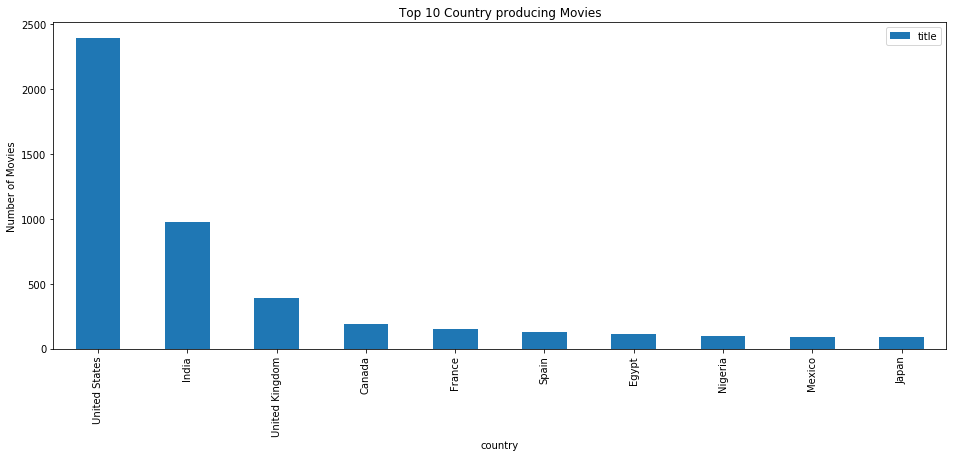

In [39]:
# Movies per country
Movie_country = Movie_df.pivot_table(index='country', values='title', aggfunc='count')
Movie_country.drop('Not Given', axis=0, inplace=True)
Movie_country.sort_values(by= 'title',ascending=False).iloc[:10].plot(kind='bar', figsize=(16,6), 
                                                              title='Top 10 Country producing Movies', 
                                                              ylabel='Number of Movies')

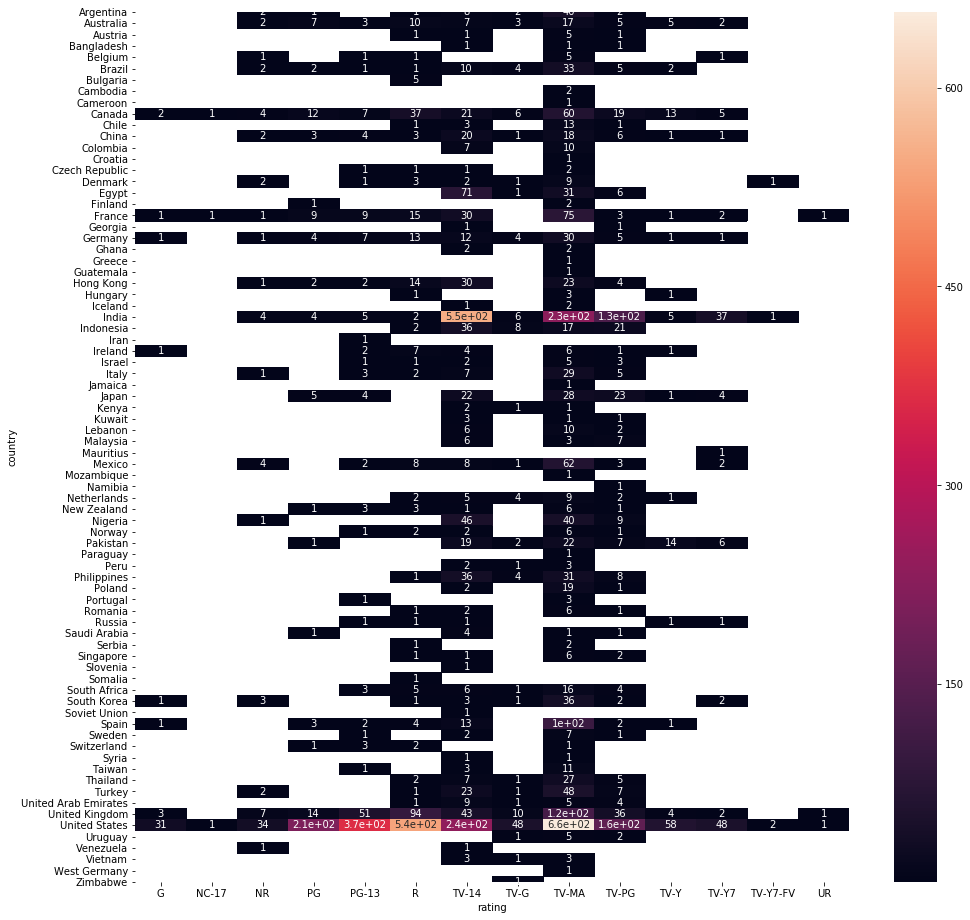

In [40]:
# Which country has produced maximum Movies in every rating category

Movie_rating = Movie_df.pivot_table(index='country',columns='rating', values='title', aggfunc='count')
# drop not_given country from TV_Show_rating
Movie_rating.drop('Not Given', axis=0, inplace=True)
plt.figure(figsize=(16,16))
sns.heatmap(Movie_rating, annot=True)
plt.show()

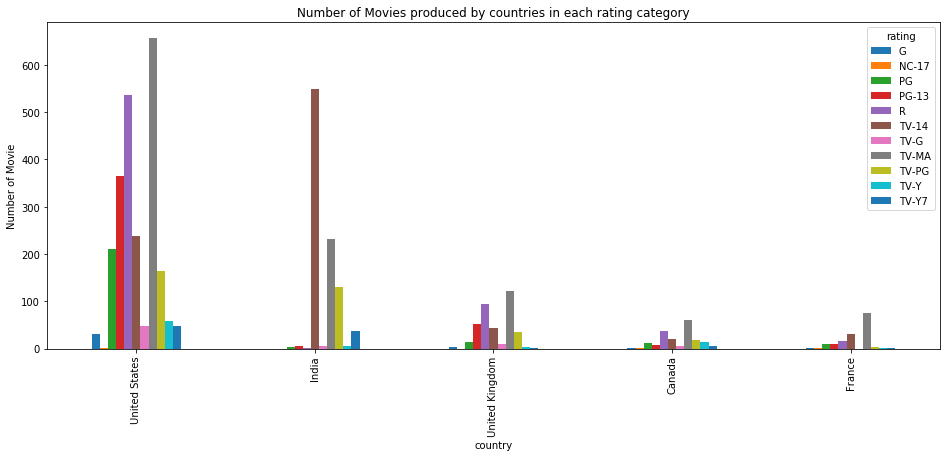

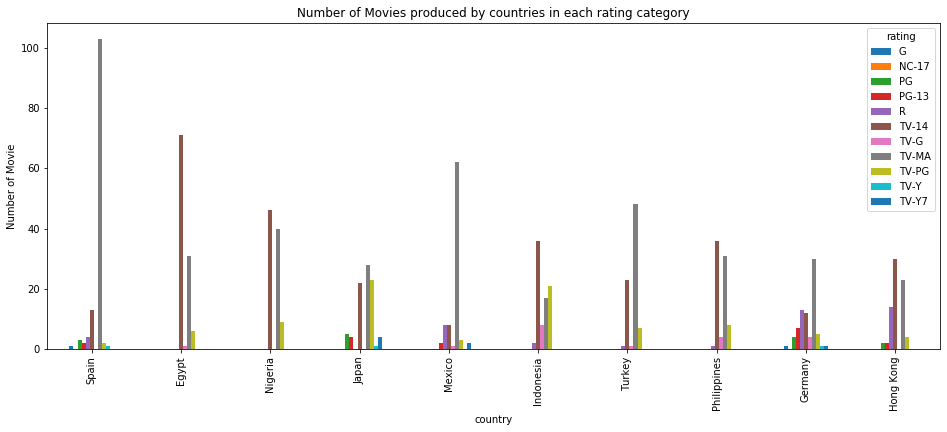

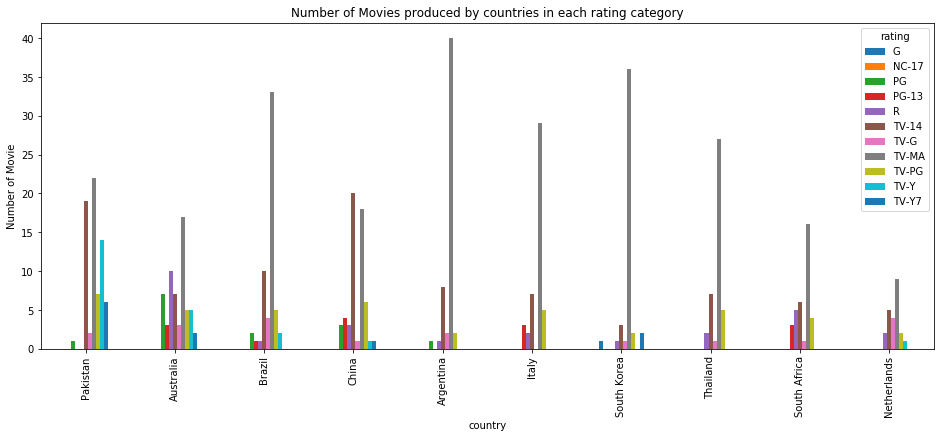

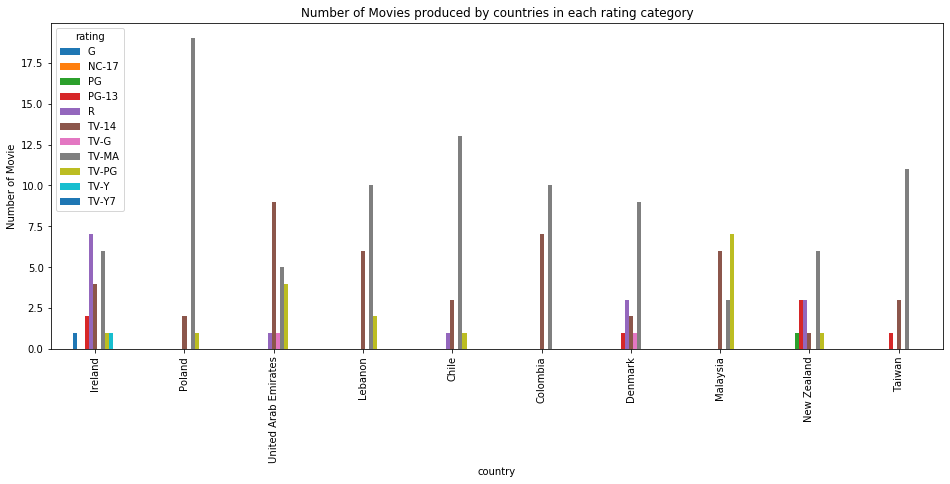

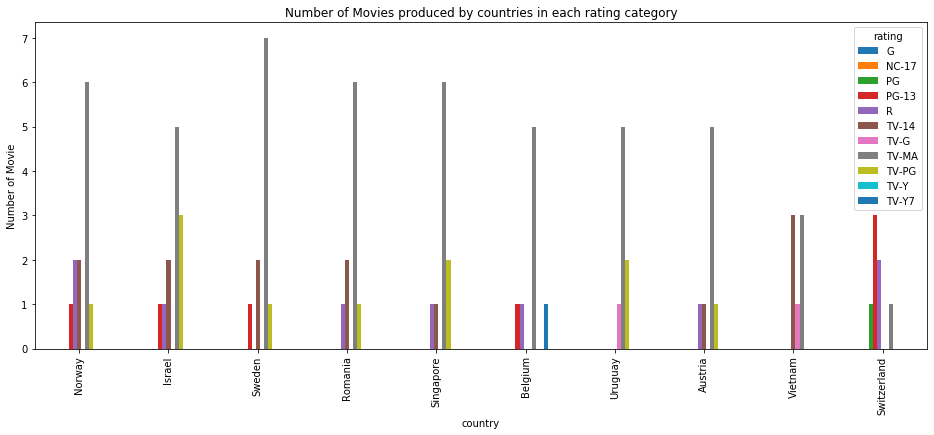

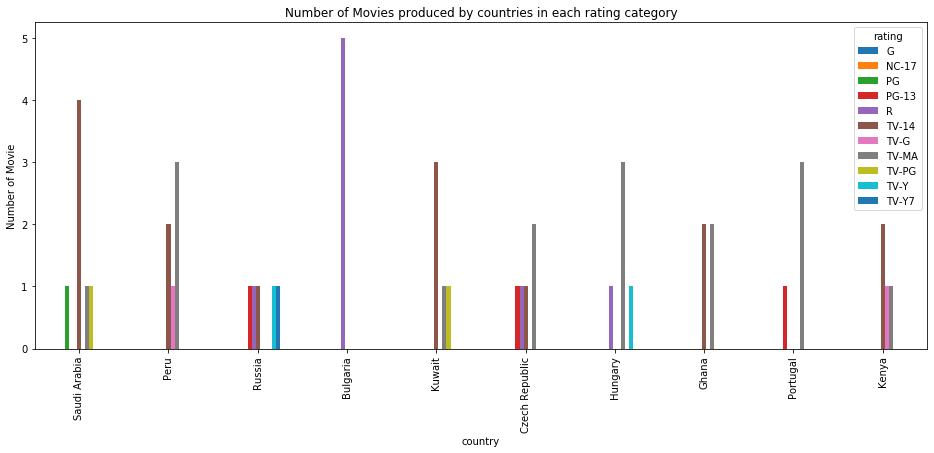

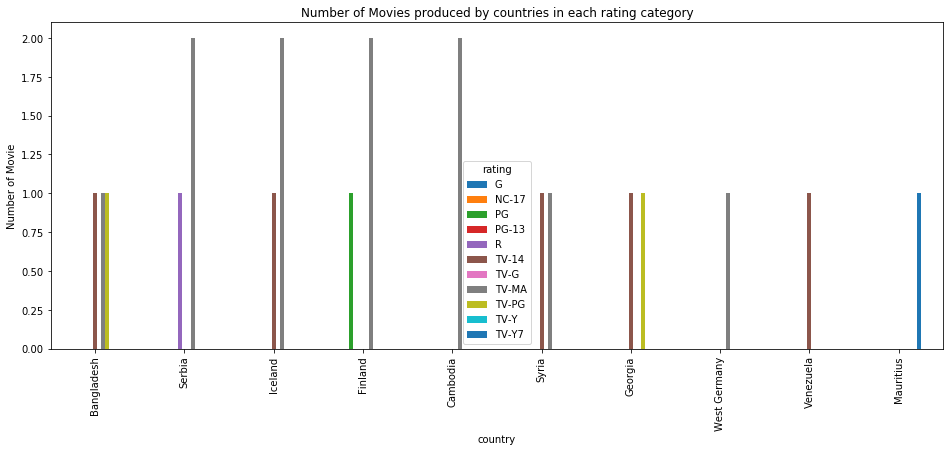

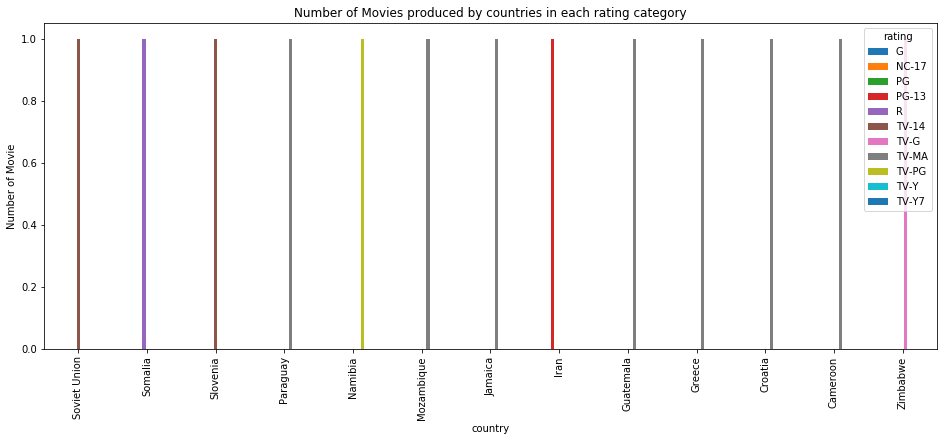

In [41]:
# Movies produced by countries in each rating

Movie_rating.drop(['NR', 'TV-Y7-FV', 'UR'],axis=1, inplace=True)
Movie_rating.fillna(0, inplace=True)
Movie_rating['Total_count']= Movie_rating.sum(axis=1)
Total_sorted_Movie=Movie_rating.sort_values(by='Total_count', ascending=False)[['G','NC-17','PG','PG-13','R','TV-14','TV-G','TV-MA','TV-PG','TV-Y','TV-Y7']]
Total_sorted_Movie.iloc[:5].plot.bar(figsize=(16,6), title='Number of Movies produced by countries in each rating category', ylabel='Number of Movie')
Total_sorted_Movie.iloc[5:15].plot.bar(figsize=(16,6), title='Number of Movies produced by countries in each rating category', ylabel='Number of Movie')
Total_sorted_Movie.iloc[15:25].plot.bar(figsize=(16,6), title='Number of Movies produced by countries in each rating category', ylabel='Number of Movie')
Total_sorted_Movie.iloc[25:35].plot.bar(figsize=(16,6), title='Number of Movies produced by countries in each rating category', ylabel='Number of Movie')
Total_sorted_Movie.iloc[35:45].plot.bar(figsize=(16,6), title='Number of Movies produced by countries in each rating category', ylabel='Number of Movie')
Total_sorted_Movie.iloc[45:55].plot.bar(figsize=(16,6), title='Number of Movies produced by countries in each rating category', ylabel='Number of Movie')
Total_sorted_Movie.iloc[55:65].plot.bar(figsize=(16,6), title='Number of Movies produced by countries in each rating category', ylabel='Number of Movie')
Total_sorted_Movie.iloc[65:].plot.bar(figsize=(16,6), title='Number of Movies produced by countries in each rating category', ylabel='Number of Movie')

In [42]:
Movie_df.date_added.dt.year.unique()

array([2021, 2019, 2020, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011,
       2009, 2008, 2010], dtype=int64)

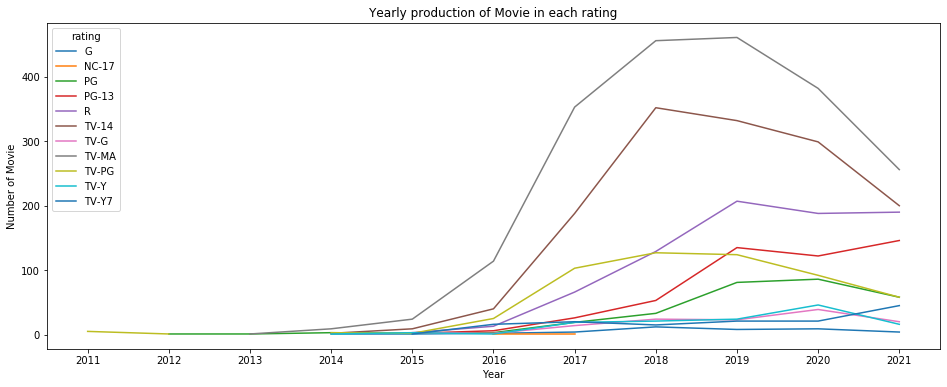

In [43]:
# Yearly production of Movies in each rating

Movie_year_rating= Movie_df.pivot_table(index=Movie_df.date_added.dt.year, columns='rating', values='title', aggfunc='count')
Movie_year_rating.drop(['NR','UR','TV-Y7-FV'], axis=1, inplace=True)
Movie_year_rating.drop([2008,2009,2010], axis=0, inplace=True)
Movie_year_rating.plot.line(figsize=(16,6), xlabel='Year', ylabel='Number of Movie', 
                            title='Yearly production of Movie in each rating', xticks=Movie_year_rating.index)

In [44]:
# Which Movie has longest duration?
max_duration= Movie_df['Duration(Mins)'].max()
Movie_df.loc[Movie_df['Duration(Mins)'] == max_duration, ['title', 'country', 'rating', 'Duration(Mins)']]

,title,country,rating,Duration(Mins)
6056,Black Mirror: Bandersnatch,United States,TV-MA,312


In [45]:
# Which Movie has shortest duration?
min_duration= Movie_df['Duration(Mins)'].min()
Movie_df.loc[Movie_df['Duration(Mins)'] == min_duration, ['title', 'country', 'rating', 'Duration(Mins)']]

,title,country,rating,Duration(Mins)
2375,Silent,United States,TV-Y,3


In [46]:
# Which Movie has been added to netflix after being released for the longest?
Movie_df['Gap_year'] = Movie_df.date_added.dt.year - Movie_df.release_year
Gap_1 = Movie_df['Gap_year'].max()
Movie_df.loc[Movie_df.Gap_year == Gap_1, ['title', 'country', 'date_added', 'release_year','Gap_year', 'rating']]

,title,country,date_added,release_year,Gap_year,rating
5167,Prelude to War,United States,2017-03-31,1942,75,TV-14
5501,The Battle of Midway,United States,2017-03-31,1942,75,TV-14


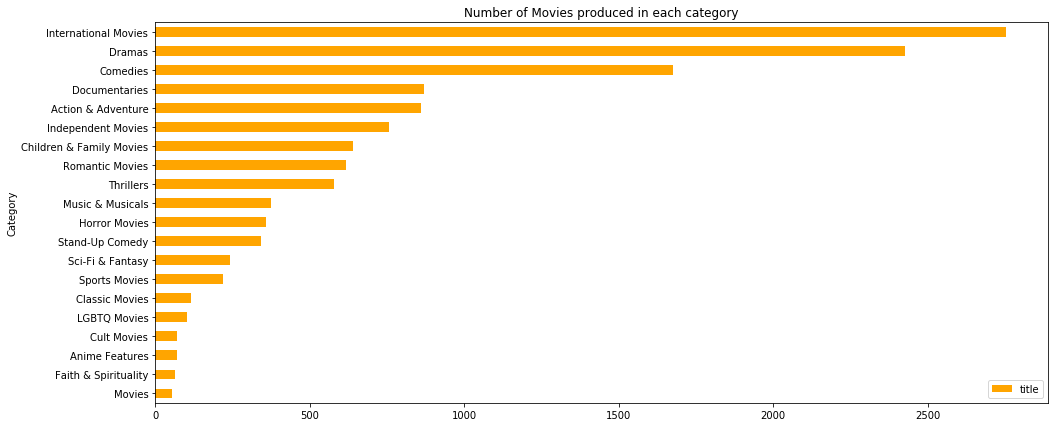

In [47]:
# which category has maximum number of Movies?

C1_Movie=Movie_df.pivot_table(index='Category_1', values='title',aggfunc='count')
C2_Movie=Movie_df.pivot_table(index='Category_2', values='title',aggfunc='count')
C3_Movie=Movie_df.pivot_table(index='Category_3', values='title',aggfunc='count')
C_total_Movie_1=C1_Movie.add(C2_Movie, fill_value=0)
C_total_Movie=C_total_Movie_1.add(C3_Movie, fill_value=0)
C_total_Movie.sort_values(by='title').plot.barh(figsize=(16,7), color='orange', ylabel='Number of Movie',
                                                   xlabel='Category',title='Number of Movies produced in each category')

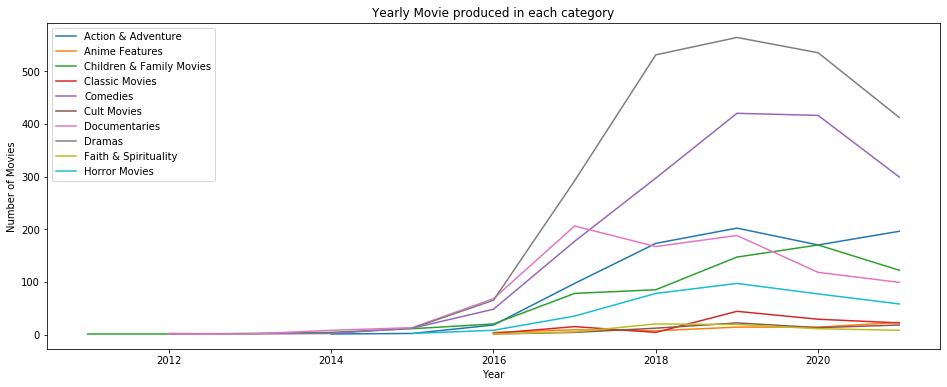

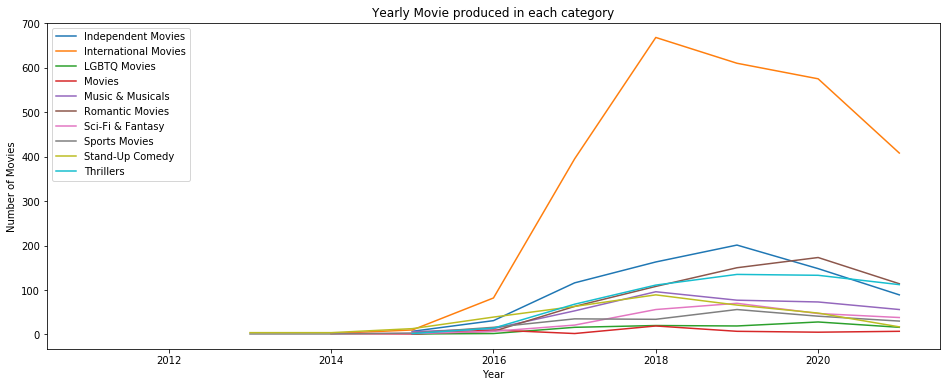

In [48]:
# Yearly Movie produced in each category 

Movie_year_category_1 = Movie_df.pivot_table(index=Movie_df.date_added.dt.year, columns='Category_1', values='title', aggfunc='count')
Movie_year_category_2 = Movie_df.pivot_table(index=Movie_df.date_added.dt.year, columns='Category_2', values='title', aggfunc='count')
Movie_year_category_3 = Movie_df.pivot_table(index=Movie_df.date_added.dt.year, columns='Category_3', values='title', aggfunc='count')
Movie_year_category_1.drop([2008,2009,2010], axis=0, inplace=True)
Movie_year_category_2.drop([2008,2009,2010], axis=0, inplace=True)
Movie_year_category_3.drop(2008, axis=0, inplace=True)
Movie_year_category_T1=Movie_year_category_1.add(Movie_year_category_2, fill_value=0)
Movie_year_category=Movie_year_category_T1.add(Movie_year_category_3, fill_value=0)
Movie_year_category.iloc[:,:10].plot.line(figsize=(16,6), xlabel='Year', ylabel='Number of Movies', title='Yearly Movie produced in each category')
Movie_year_category.iloc[:,10:].plot.line(figsize=(16,6), xlabel='Year', ylabel='Number of Movies', title='Yearly Movie produced in each category')

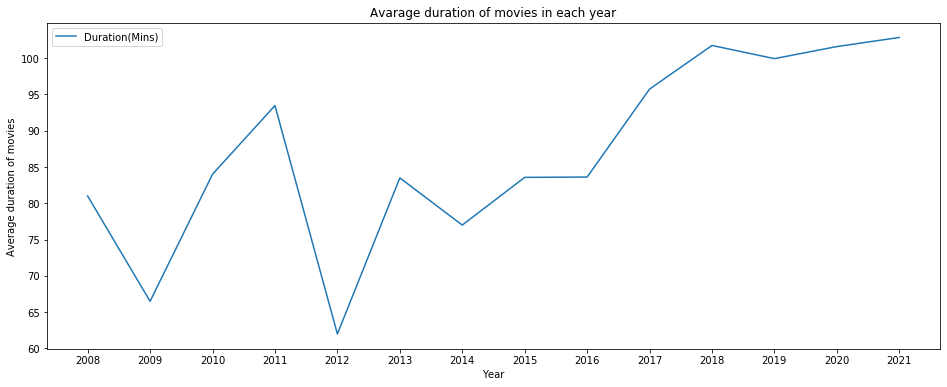

In [49]:
# Average Mins in each year
Average_duration = Movie_df.pivot_table(index=Movie_df.date_added.dt.year, values='Duration(Mins)', aggfunc='mean')
Average_duration.plot.line(figsize=(16,6), xlabel='Year', ylabel='Average duration of movies', 
                           title='Avarage duration of movies in each year', xticks=Average_duration.index)